# T1.1: MNIST

## mnist_cnn.py


ssh -o ProxyCommand="ssh -g -L 8889:localhost:8889 s4451856@sshgw.leidenuniv.nl -q -W U0065090:22" -g -L 8889:localhost:8889 s4451856@U0065090

In [ ]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import optimizers
from keras import backend as K
from keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow.keras import Loss

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import os

In [106]:
batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/50


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1079 - loss: 2.2964 - val_accuracy: 0.3249 - val_loss: 2.2617
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2359 - loss: 2.2552 - val_accuracy: 0.5073 - val_loss: 2.2111
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3371 - loss: 2.2059 - val_accuracy: 0.5964 - val_loss: 2.1419
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4260 - loss: 2.1362 - val_accuracy: 0.6712 - val_loss: 2.0436
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4886 - loss: 2.0376 - val_accuracy: 0.7194 - val_loss: 1.9090
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5367 - loss: 1.9067 - val_accuracy: 0.7436 - val_loss: 1.7356
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5670 - loss: 1.7551 - val_accuracy: 0.7599 - val_loss: 1.5354
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6006 - loss: 1.5806 - val_accuracy: 0.7759 - val_

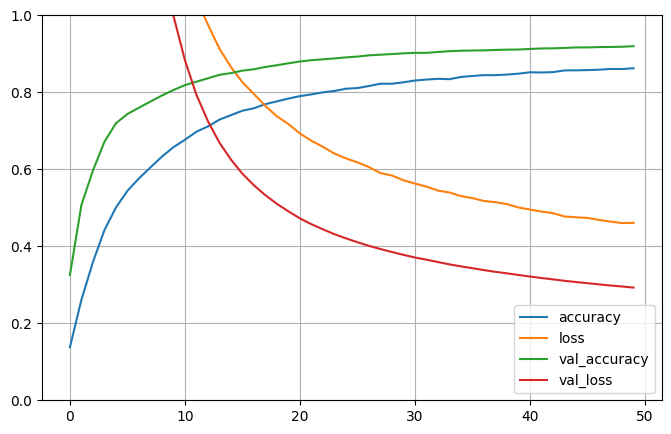

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## mnist_mlp.py


In [ ]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

In [109]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_287 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_288 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_289 (Dense)               │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8623 - loss: 0.4422 - val_accuracy: 0.9657 - val_loss: 0.1067
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9650 - loss: 0.1121 - val_accuracy: 0.9718 - val_loss: 0.0867
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9768 - loss: 0.0753 - val_accuracy: 0.9771 - val_loss: 0.0740
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9820 - loss: 0.0571 - val_accuracy: 0.9816 - val_loss: 0.0649
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9869 - loss: 0.0419 - val_accuracy: 0.9818 - val_loss: 0.0599
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9873 - loss: 0.0392 - val_accuracy: 0.9783 - val_loss: 0.0756
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9900 - loss: 0.0311 - val_accuracy: 0.9822 - val_loss: 0.0667
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0299 - val_accuracy: 0.

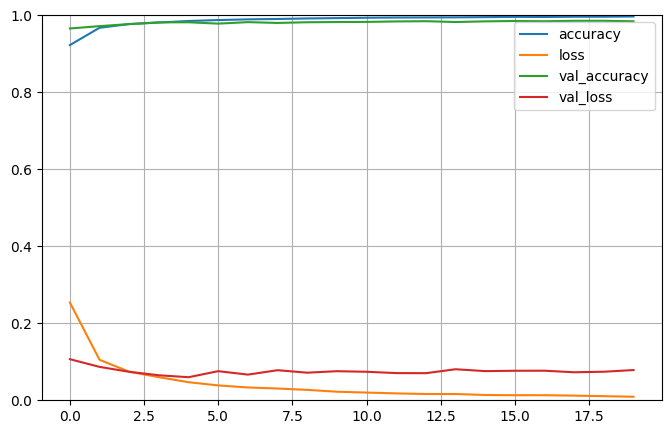

In [110]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# T1.2: Fashion MNIST

## (a) Multi-Layer Perceptron

In [ ]:
os.environ["KERAS_BACKEND"] = "tensorflow"

fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

classNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


def MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 hiddenLayers=1,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 optimiser="sgd",
                 epochs=20,
                 alpha=5):

  MLPModel = Sequential()
  MLPModel.add(keras.layers.Flatten(input_shape=[28, 28]))

  for i in range(hiddenLayers):
    MLPModel.add(keras.layers.Dense(300, activation=hiddenActivation))
    
    MLPModel.add(keras.layers.Dense(100, activation=hiddenActivation))


  MLPModel.add(keras.layers.Dense(10, activation=outputActivation))

  MLPModel.compile(loss="sparse_categorical_crossentropy",
  optimizer=optimiser,
  metrics=["accuracy"])

  history = MLPModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.show()

  test_loss, test_acc = MLPModel.evaluate(xTest,  yTest, verbose=2)
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc

## (b) Convolutional Neural Network

In [57]:
def CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 learnRate=0.0001,
                 hiddenLayers=1,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 convActivation="relu",
                 optimiser=keras.optimizers.SGD,
                 epochs=50,
                 alpha=5,
                 inputShape=(28, 28, 1),
                 outputShape=10,
                 lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):

  CNNModel = Sequential()
  CNNModel.add(Conv2D(32, (3, 3), activation=convActivation, input_shape=inputShape))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation=convActivation))

  CNNModel.add(Flatten())

  for i in range(hiddenLayers):
    CNNModel.add(Dense(64, activation=hiddenActivation))

  CNNModel.add(Dense(outputShape, activation=outputActivation))

  CNNModel.compile(optimizer=optimiser(learning_rate=learnRate),
                loss=lossFunction,
                metrics=['accuracy'])

  #CNNModel.summary()
  history = CNNModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))
  
  print(history.history)

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.show()

  #print(CNNModel.predict(xVal))

  val_loss, val_acc = CNNModel.evaluate(xVal,  yVal, verbose=2)
  test_loss, test_acc = CNNModel.evaluate(xTest,  yTest, verbose=2)

  print(f"Learning Rate: {learnRate}")
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Conv Activation: {convActivation}")
  #print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Validation loss: {val_loss}")
  print(f"Validation accuracy: {val_acc}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc, val_acc

## Experimentation and Evaluation

### MLP Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 1

Optimiser: Adam

Output Activation: SoftPlus

Hidden Activation: Tanh

Alpha:  5

Epochs: 30

Test accuracy: 0.8705999851226807

In [65]:
def eval(model, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=False,
         inputShape=(28, 28, 1), outputShape=10,
         lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):
    
    # LearnRate
    bestLearnRate = (0.1, 0, 0)
    #for learnRate in [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=lossFunction,
    #                              learnRate=learnRate)

    #    if val_acc > bestLearnRate[2]:
    #        bestLearnRate = (learnRate, test_acc, val_acc)

    #    elif val_acc < bestLearnRate[2] - 0.1:
    #        break

    
    # Epochs
    bestEpochs = (76, 0, 0)
    #for epochs in range(1, 250, 25):
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=lossFunction,
    #                              learnRate=bestLearnRate[0],
    #                              epochs=epochs)

    #    if val_acc > bestEpochs[2]:
    #        bestEpochs = (epochs, test_acc, val_acc)

    #    elif val_acc < bestEpochs[2] - 0.1:
    #        break


    # Optimiser
    bestOptimiser = (keras.optimizers.Adam, 0, 0)
    for optimiser in [keras.optimizers.SGD,
                    keras.optimizers.RMSprop,
                    keras.optimizers.Adam,
                    keras.optimizers.AdamW,
                    keras.optimizers.Adadelta,
                    keras.optimizers.Adagrad,
                    keras.optimizers.Adamax,
                    keras.optimizers.Adafactor,
                    keras.optimizers.Nadam,
                    keras.optimizers.Ftrl,
                    keras.optimizers.Lion]:
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                  learnRate=bestLearnRate[0],
                                epochs=bestEpochs[0],
                                optimiser=optimiser)

        if val_acc > bestOptimiser[2]:
            bestOptimiser = (optimiser, test_acc, val_acc)


    # Output activation function
    bestOutActivation = ("softplus", 0, 0)
    for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
                    "tanh", "selu", "elu", "exponential"]:
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                  learnRate=bestLearnRate[0],
                                outputActivation=activation,
                                epochs=bestEpochs[0],
                                optimiser=bestOptimiser[0])

        if val_acc > bestOutActivation[2]:
            bestOutActivation = (activation, test_acc, val_acc)


    # Hidden Layer activation function
    bestHiddenActivation = ("tanh", 0, 0)
    for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
                    "tanh", "selu", "elu", "exponential"]:
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                  learnRate=bestLearnRate[0],
                                outputActivation=bestOutActivation[0],
                                hiddenActivation=activation,
                                epochs=bestEpochs[0],
                                optimiser=bestOptimiser[0])

        if val_acc > bestHiddenActivation[2]:
            bestHiddenActivation = (activation, test_acc, val_acc)

    
    # Convolutional layer Activation Function
    bestConvActivation = ("relu", 0, 0)
    if CNN:
        for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
                        "tanh", "selu", "elu", "exponential"]:
            test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                             inputShape=inputShape, outputShape=outputShape,
                                             lossFunction=lossFunction,
                                             learnRate=bestLearnRate[0],
                                            outputActivation=bestOutActivation[0],
                                            hiddenActivation=bestHiddenActivation[0],
                                            convActivation=activation,
                                            epochs=bestEpochs[0],
                                            optimiser=bestOptimiser[0])

            if val_acc > bestConvActivation[2]:
                bestConvActivation = (activation, test_acc, val_acc)


    # Hidden Layers
    bestHidden = (1, 0, 0)
    accuracyList = []
    for layers in range(1, 50):
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                  learnRate=bestLearnRate[0],
                                hiddenLayers=layers,
                                outputActivation=bestOutActivation[0],
                                hiddenActivation=bestHiddenActivation[0],
                                epochs=bestEpochs[0],
                                optimiser=bestOptimiser[0])
    
        accuracyList.append(val_acc)

        if val_acc > bestHidden[2]:
            bestHidden = (layers, test_acc, val_acc)

    
    


    # Regularisations
    bestAlpha = (0, 0, 0)
    #alphas = np.logspace(-10, -2, 200)
    #for alpha in alphas:
    #  test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                          hiddenLayers=bestHidden[0],
    #                          outputActivation=bestOutActivation[0],
    #                          hiddenActivation=bestHiddenActivation[0],
    #                          epochs=bestEpochs[0],
    #                          optimiser=bestOptimiser[0],
    #                          alpha=alpha)

    #  if accuracy > bestAlpha[2]:
    #   bestAlpha = (alpha, accuracy)

    print(f"Best Learning Rate: {bestLearnRate[0]}")
    print(f"Best Hidden layers: {bestHidden[0]}")
    print(f"Best Optimiser: {bestOptimiser[0]}")
    print(f"Best Output Activation: {bestOutActivation[0]}")
    print(f"Best Hidden Activation: {bestHiddenActivation[0]}")
    print(f"Best Conv Activation: {bestConvActivation[0]}")
    print(f"Best Epochs: {bestEpochs[0]}")
    print(f"Final Val accuracy: {bestHidden[2]}")
    print(f"Final Test accuracy: {bestHidden[1]}")

    plt.figure()
    plt.plot(accuracyList, range(len(accuracyList)))
    plt.show()

    return {"bestHidden": bestHidden[0], "bestOptimiser": bestOptimiser[0],
            "bestOutActivation": bestOutActivation[0],
            "bestHiddenActivation": bestOutActivation[0],
            "bestEpochs": bestEpochs[0]}

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

# MLP model eval
bestSettings = eval(MLPModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest)
print(bestSettings)


NameError: name 'MLPModelTest' is not defined

### CNN Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 2

Optimiser: Adamax

Output Activation: elu

Hidden Activation: sigmoid

Conv Activation: relu

Epochs: 30

Test loss: 0.3733844459056854

Test accuracy: 0.8733000159263611

In [117]:
# CNN model eval
bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=True)
print(bestSettings)

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 793/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3406 - loss: 1.8690

KeyboardInterrupt: 

### CIFAR-10

In [ ]:
cifar = keras.datasets.cifar10
(xTrainFull, yTrainFull), (xTest, yTest) = cifar.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2186 - loss: 2.0889 - val_accuracy: 0.3942 - val_loss: 1.6767
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4040 - loss: 1.6336 - val_accuracy: 0.4630 - val_loss: 1.4871
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4724 - loss: 1.4548 - val_accuracy: 0.5140 - val_loss: 1.3554
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5212 - loss: 1.3306 - val_accuracy: 0.5556 - val_loss: 1.2356
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5598 - loss: 1.2380 - val_accuracy: 0.5768 - val_loss: 1.1918
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5868 - loss: 1.1543 - val_accuracy: 0.5942 - val_loss: 1.1503
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6179 - loss: 1.0828 - val_accuracy: 0.6284 - val_loss: 1.0532
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6363 - loss: 1.0261 - 

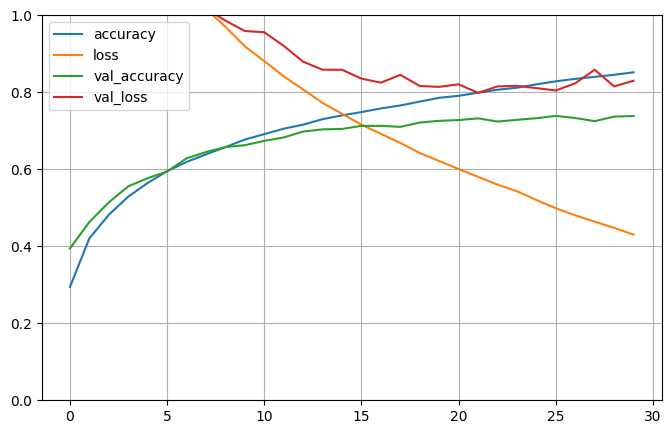

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[-0.9380355  -0.9677594   2.4196448  ... -0.32585365 -0.9036494
  -0.6813639 ]
 [ 1.9887094   2.2759967   0.21670085 ...  2.5167992   1.6110954
   8.821737  ]
 [ 1.6281984   2.9375904  -0.47198826 ... -0.42359927  3.9749403
   6.1452827 ]
 ...
 [-0.7871862  -0.8028617  -0.26957917 ... -0.79063684  0.52774817
   1.2293673 ]
 [-0.56382054 -0.99855167  5.3207054  ...  4.9019833  -0.993149
  -0.9721245 ]
 [-0.9138071  -0.99336004  4.607959   ... -0.71396863 -0.04168497
  -0.9667674 ]]
157/157 - 0s - 524us/step - accuracy: 0.7384 - loss: 0.8300
313/313 - 1s - 3ms/step - accuracy: 0.5573 - loss: 1.7743
Hidden layers: 2
Optimiser: adamax
Output Activation: elu
Hidden Activation: sigmoid
Conv Activation: relu
Epochs: 30
Validation loss: 0.8300354480743408
Validation accuracy: 0.7383999824523926
Test loss: 1.7742644548416138
Test accuracy: 0.5572999715805054
0.5572999715805054 0.7383999824523926


In [ ]:
#Hidden layers: 2
#Optimiser: Adamax
#Output Activation: elu
#Hidden Activation: sigmoid
#Conv Activation: relu
#Epochs: 30
#Test loss: 0.3733844459056854
#Test accuracy: 0.8733000159263611

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=2,
                          outputActivation="elu",
                          hiddenActivation="sigmoid",
                          convActivation="relu",
                          epochs=30,
                          optimiser="adamax",
                          inputShape=(32, 32, 3))

print(test_acc, val_acc)

# T2.1 Tell-the-time Network

## (a) Classification

24 Classes

In [13]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int(time[0] + (time[1] // 30)) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=2,
                          outputActivation="softmax",
                          hiddenActivation="relu",
                          convActivation="relu",
                          epochs=30,
                          optimiser="adam",
                          inputShape=(75, 75, 1),
                          outputShape=24)

print(test_acc, val_acc)

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730754322.734757 1523152 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730754327.228152 1523152 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730754327.2284

Epoch 1/30


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
I0000 00:00:1730754332.103361 1523353 service.cc:146] XLA service 0x7f2414002620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730754332.103380 1523353 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-11-04 22:05:32.140106: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-04 22:05:32.811173: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-11-04 22:05:32.959712: W external/local_xla/xla/servi

 66/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0882 - loss: 2.8707

I0000 00:00:1730754341.917934 1523353 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.0864 - loss: 2.6570 - val_accuracy: 0.0828 - val_loss: 2.5487
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0788 - loss: 2.5548 - val_accuracy: 0.0767 - val_loss: 2.5518
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0896 - loss: 2.5474 - val_accuracy: 0.0828 - val_loss: 2.5195
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1262 - loss: 2.4464 - val_accuracy: 0.2239 - val_loss: 2.0655
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2573 - loss: 1.9390 - val_accuracy: 0.3711 - val_loss: 1.5749
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4475 - loss: 1.3795 - val_accuracy: 0.5661 - val_loss: 1.1190
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6201 - loss: 0.9416 - val_accuracy: 0.6494 - val_loss: 0.8921
Epoch 8/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7387 - loss: 0.6701 - val_accuracy: 0.7156 - val

NameError: name 'pd' is not defined

720 Classes

In [46]:
class circularLoss(Loss):
    def call(self, y_true, y_pred):
        return tf.reduce_mean(tf.abs(tf.atan2(tf.sin(y_true - y_pred), tf.cos(y_true - y_pred))))

Epoch 1/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0010 - loss: 6.5830 - val_accuracy: 5.5556e-04 - val_loss: 6.5860
Epoch 2/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 8.7536e-04 - loss: 6.5817 - val_accuracy: 0.0000e+00 - val_loss: 6.5958
Epoch 3/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0011 - loss: 6.5808 - val_accuracy: 0.0000e+00 - val_loss: 6.6019
Epoch 4/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0013 - loss: 6.5802 - val_accuracy: 0.0000e+00 - val_loss: 6.6020
Epoch 5/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 9.1297e-04 - loss: 6.5792 - val_accuracy: 0.0011 - val_loss: 6.6067
Epoch 6/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0016 - loss: 6.5785 - val_accuracy: 5.5556e-04 - val_loss: 6.6035
Epoch 7/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0014 - loss: 6.5779 - val_accuracy: 0.0000e+00 - val_loss: 6.6085
Epoch 8/250
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 

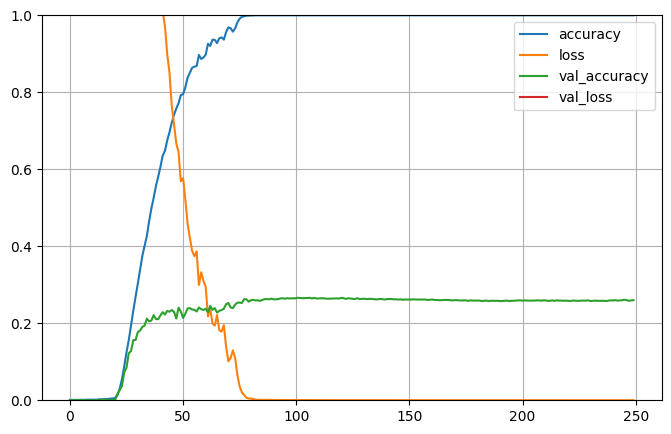

57/57 - 0s - 866us/step - accuracy: 0.2600 - loss: 9.3937
57/57 - 0s - 937us/step - accuracy: 0.2917 - loss: 9.2100
Learning Rate: 0.1
Hidden layers: 6
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: elu
Hidden Activation: elu
Conv Activation: relu
Epochs: 250
Validation loss: 9.393745422363281
Validation accuracy: 0.25999999046325684
Test loss: 9.209981918334961
Test accuracy: 0.2916666567325592
0.2916666567325592 0.25999999046325684


In [69]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int((time[0] * 60) + time[1]) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          learnRate=0.1,
                          hiddenLayers=6,
                          outputActivation="elu",
                          hiddenActivation="elu",
                          convActivation="relu",
                          epochs=250,
                          optimiser=keras.optimizers.Adagrad,
                          inputShape=(75, 75, 1),
                          outputShape=720)
                          #lossFunction=keras.losses.cosine_similarity)

print(test_acc, val_acc)

#bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=True,
#                    inputShape=(75, 75, 1), outputShape=720)#, lossFunction=circularLoss)
#print(bestSettings)

## (b) Regression

<class 'keras.src.optimizers.sgd.SGD'> <class '__main__.circularLoss'>
Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0016 - loss: 1.5744 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0017 - loss: 1.5746 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0018 - loss: 1.5859 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 8.9692e-04 - loss: 1.5796 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0016 - loss: 1.5744 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0012 - loss: 1.5785 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0017 - loss: 1.5802 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 8/20
450/450 ━━━━━━━━━━

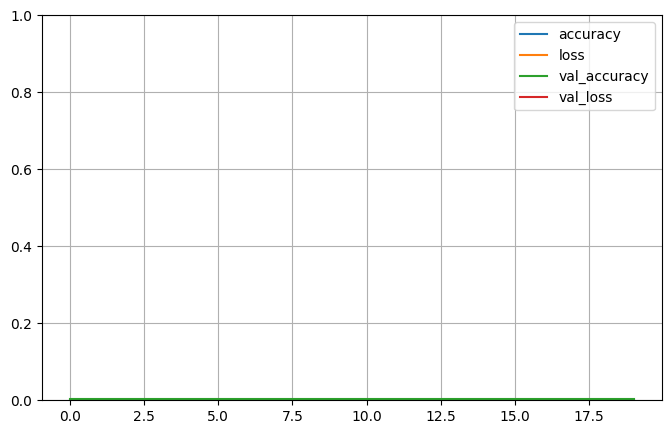

57/57 - 0s - 765us/step - accuracy: 0.0028 - loss: 1.6322
57/57 - 0s - 783us/step - accuracy: 0.0000e+00 - loss: 1.5626
Hidden layers: 1
Optimiser: <class 'keras.src.optimizers.sgd.SGD'>
Output Activation: softmax
Hidden Activation: relu
Conv Activation: relu
Epochs: 20
Validation loss: 1.6322063207626343
Validation accuracy: 0.0027777778450399637
Test loss: 1.5626013278961182
Test accuracy: 0.0
<class 'keras.src.optimizers.sgd.SGD'> <class '__main__.circularLoss'>
Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0017 - loss: 1.5934 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0015 - loss: 1.5686 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 9.6016e-04 - loss: 1.5752 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 9.1586e-04 - loss: 1.5783 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 5/20

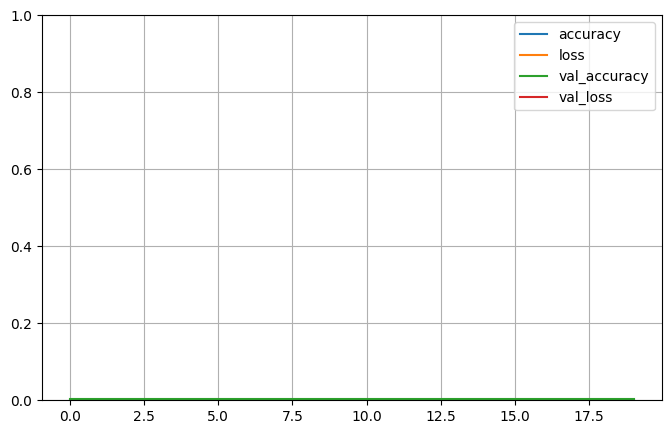

57/57 - 0s - 783us/step - accuracy: 0.0028 - loss: 1.6322
57/57 - 0s - 886us/step - accuracy: 0.0000e+00 - loss: 1.5626
Hidden layers: 1
Optimiser: <class 'keras.src.optimizers.sgd.SGD'>
Output Activation: softmax
Hidden Activation: relu
Conv Activation: relu
Epochs: 20
Validation loss: 1.6322063207626343
Validation accuracy: 0.0027777778450399637
Test loss: 1.5626013278961182
Test accuracy: 0.0
<class 'keras.src.optimizers.sgd.SGD'> <class '__main__.circularLoss'>
Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0016 - loss: 1.5962 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0015 - loss: 1.5875 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0016 - loss: 1.5832 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0016 - loss: 1.5842 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 5/20
450/450

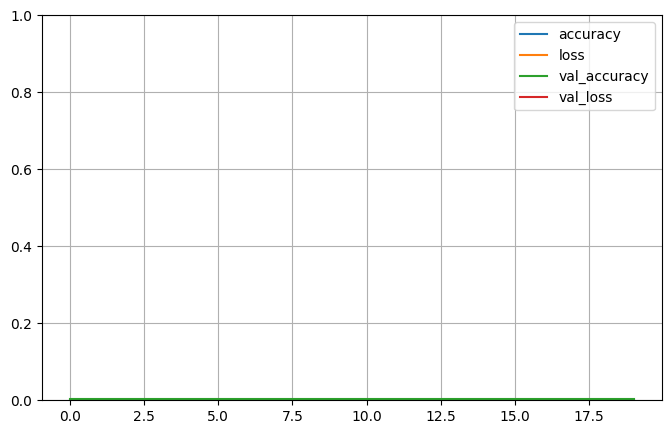

57/57 - 0s - 747us/step - accuracy: 0.0028 - loss: 1.6322
57/57 - 0s - 748us/step - accuracy: 0.0000e+00 - loss: 1.5626
Hidden layers: 1
Optimiser: <class 'keras.src.optimizers.sgd.SGD'>
Output Activation: softmax
Hidden Activation: relu
Conv Activation: relu
Epochs: 20
Validation loss: 1.6322063207626343
Validation accuracy: 0.0027777778450399637
Test loss: 1.5626013278961182
Test accuracy: 0.0
<class 'keras.src.optimizers.sgd.SGD'> <class '__main__.circularLoss'>
Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0012 - loss: 1.5854 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0015 - loss: 1.5846 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 9.9420e-04 - loss: 1.5800 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0019 - loss: 1.5839 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 5/20
450

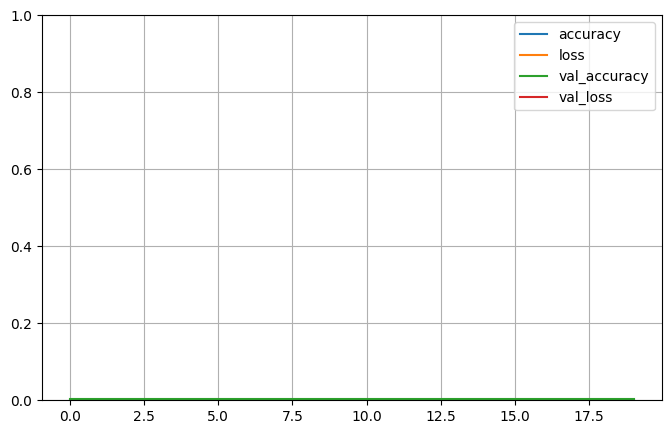

57/57 - 0s - 752us/step - accuracy: 0.0028 - loss: 1.6322
57/57 - 0s - 737us/step - accuracy: 0.0000e+00 - loss: 1.5626
Hidden layers: 1
Optimiser: <class 'keras.src.optimizers.sgd.SGD'>
Output Activation: softmax
Hidden Activation: relu
Conv Activation: relu
Epochs: 20
Validation loss: 1.6322063207626343
Validation accuracy: 0.0027777778450399637
Test loss: 1.5626013278961182
Test accuracy: 0.0
<class 'keras.src.optimizers.sgd.SGD'> <class '__main__.circularLoss'>
Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0011 - loss: 1.5680 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0013 - loss: 1.5897 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0012 - loss: 1.5884 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0019 - loss: 1.5898 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 5/20
450/450

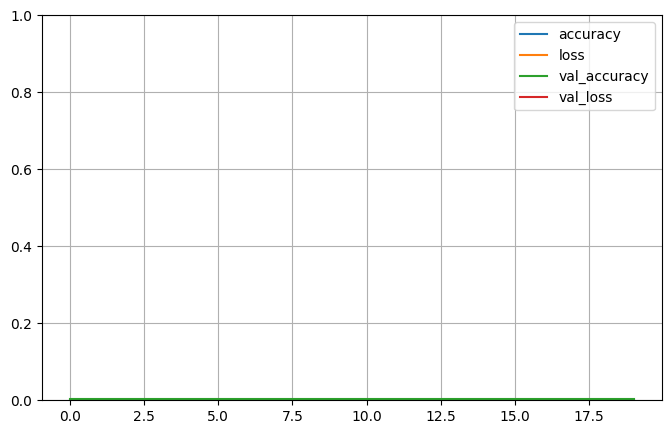

57/57 - 0s - 754us/step - accuracy: 0.0028 - loss: 1.6322
57/57 - 0s - 715us/step - accuracy: 0.0000e+00 - loss: 1.5626
Hidden layers: 1
Optimiser: <class 'keras.src.optimizers.sgd.SGD'>
Output Activation: softmax
Hidden Activation: relu
Conv Activation: relu
Epochs: 20
Validation loss: 1.6322063207626343
Validation accuracy: 0.0027777778450399637
Test loss: 1.5626013278961182
Test accuracy: 0.0
<class 'keras.src.optimizers.sgd.SGD'> <class '__main__.circularLoss'>
Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0017 - loss: 1.5957 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0011 - loss: 1.5842 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0015 - loss: 1.6048 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 9.9928e-04 - loss: 1.5811 - val_accuracy: 0.0028 - val_loss: 1.6322
Epoch 5/20
450

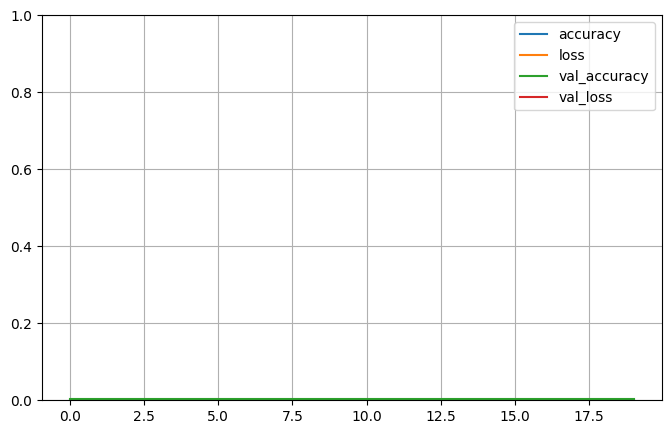

57/57 - 0s - 755us/step - accuracy: 0.0028 - loss: 1.6322
57/57 - 0s - 747us/step - accuracy: 0.0000e+00 - loss: 1.5626
Hidden layers: 1
Optimiser: <class 'keras.src.optimizers.sgd.SGD'>
Output Activation: softmax
Hidden Activation: relu
Conv Activation: relu
Epochs: 20
Validation loss: 1.6322063207626343
Validation accuracy: 0.0027777778450399637
Test loss: 1.5626013278961182
Test accuracy: 0.0
<class 'keras.src.optimizers.sgd.SGD'> <class '__main__.circularLoss'>
{}


TypeError: no numeric data to plot

In [52]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([float(time[0] + (time[1] / 60)) for time in ySmallClock])

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0
    
xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

#test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          hiddenLayers=2,
#                          outputActivation="softmax",
#                          hiddenActivation="relu",
#                          convActivation="relu",
#                          epochs=250,
#                          optimiser=keras.optimizers.Adam(learning_rate=0.00001),
#                          inputShape=(75, 75, 1),
#                          outputShape=1,
#                          lossFunction=circularLoss)

#print(test_acc, val_acc)

bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=True,
                    inputShape=(75, 75, 1), outputShape=1, lossFunction=circularLoss)
print(bestSettings)